### Steps to solve the Sentiment Classification problem using Neural Networks

1. Importing the required libraries
2. Loading and preprocessing the dataset
3. Defining the model architecture
4. Training the model and visualizing the results
5. Tuning hyperparameters of neural network

### 1. Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential
from keras.optimizers import Adam

### 2. Loading and preprocessing the dataset

In [ ]:
tweets_data = pd.read_csv('train_2kmZucJ.csv')
tweets_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
# distribution of classes
tweets_data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

In [ ]:
# separate features and target variable
x = tweets_data['tweet']
y = tweets_data['label']

In [ ]:
# create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10, stratify=y)

In [ ]:
# shape of training and test set
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((5544,), (5544,)), ((2376,), (2376,)))

In [ ]:
# creating the countvectorizer
count_vector = CountVectorizer(stop_words = 'english')

In [ ]:
# Fit and transform the training data
x_train = count_vector.fit_transform(x_train)
# transform the testing data
x_test = count_vector.transform(x_test)

In [ ]:
# shape of transformed data
x_train.shape, x_test.shape

((5544, 17721), (2376, 17721))

In [ ]:
x_train

<5544x17721 sparse matrix of type '<class 'numpy.int64'>'
	with 74477 stored elements in Compressed Sparse Row format>

In [ ]:
# converting the transformed data into array
x_train = x_train.toarray()
x_test = x_test.toarray()

In [ ]:
# shape of transformed data
x_train.shape, x_test.shape

((5544, 17721), (2376, 17721))

In [ ]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 3. Defining the model architecture

In [ ]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1772200   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,772,301
Trainable params: 1,772,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. Training the model and visualizing the results

In [ ]:
# training the model
model_history = model.fit(x_train, y_train, epochs=20, batch_size=128,validation_data=(x_test,y_test))

Epoch 1/20
44/44 [==============================] - 12s 23ms/step - loss: 0.5928 - accuracy: 0.7544 - val_loss: 0.5670 - val_accuracy: 0.7441
Epoch 2/20
44/44 [==============================] - 1s 14ms/step - loss: 0.5659 - accuracy: 0.7440 - val_loss: 0.5632 - val_accuracy: 0.7441
Epoch 3/20
44/44 [==============================] - 1s 15ms/step - loss: 0.5662 - accuracy: 0.7409 - val_loss: 0.5610 - val_accuracy: 0.7441
Epoch 4/20
44/44 [==============================] - 1s 14ms/step - loss: 0.5619 - accuracy: 0.7430 - val_loss: 0.5588 - val_accuracy: 0.7441
Epoch 5/20
44/44 [==============================] - 1s 15ms/step - loss: 0.5574 - accuracy: 0.7452 - val_loss: 0.5568 - val_accuracy: 0.7441
Epoch 6/20
44/44 [==============================] - 1s 14ms/step - loss: 0.5641 - accuracy: 0.7367 - val_loss: 0.5548 - val_accuracy: 0.7441
Epoch 7/20
44/44 [==============================] - 1s 15ms/step - loss: 0.5572 - accuracy: 0.7410 - val_loss: 0.5525 - val_accuracy: 0.7441
Epoch 8/20
4

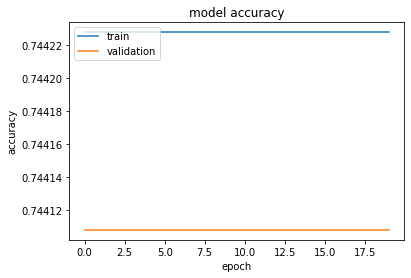

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 5. Tuning hyperparameters of neural network

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-4)

In [ ]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# training the model
model_history = model.fit(x_train, y_train, epochs=20, batch_size=128,validation_data=(x_test,y_test))

Epoch 1/20
44/44 [==============================] - 1s 19ms/step - loss: 0.5836 - accuracy: 0.7407 - val_loss: 0.5567 - val_accuracy: 0.7441
Epoch 2/20
44/44 [==============================] - 1s 15ms/step - loss: 0.5448 - accuracy: 0.7487 - val_loss: 0.5371 - val_accuracy: 0.7441
Epoch 3/20
44/44 [==============================] - 1s 15ms/step - loss: 0.5272 - accuracy: 0.7449 - val_loss: 0.5222 - val_accuracy: 0.7441
Epoch 4/20
44/44 [==============================] - 1s 15ms/step - loss: 0.5144 - accuracy: 0.7412 - val_loss: 0.5085 - val_accuracy: 0.7441
Epoch 5/20
44/44 [==============================] - 1s 15ms/step - loss: 0.5017 - accuracy: 0.7368 - val_loss: 0.4951 - val_accuracy: 0.7441
Epoch 6/20
44/44 [==============================] - 1s 15ms/step - loss: 0.4777 - accuracy: 0.7473 - val_loss: 0.4822 - val_accuracy: 0.7441
Epoch 7/20
44/44 [==============================] - 1s 15ms/step - loss: 0.4690 - accuracy: 0.7391 - val_loss: 0.4693 - val_accuracy: 0.7441
Epoch 8/20
44

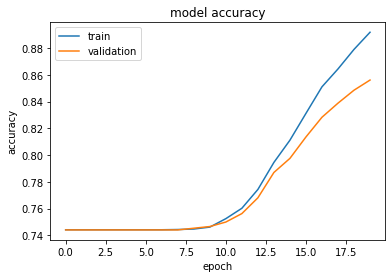

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Increasing the number of epochs

In [ ]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# training the model
model_history = model.fit(x_train, y_train, epochs=50, batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
44/44 [==============================] - 1s 19ms/step - loss: 0.7235 - accuracy: 0.4456 - val_loss: 0.5078 - val_accuracy: 0.7441
Epoch 2/50
44/44 [==============================] - 1s 15ms/step - loss: 0.4883 - accuracy: 0.7370 - val_loss: 0.4638 - val_accuracy: 0.7441
Epoch 3/50
44/44 [==============================] - 1s 15ms/step - loss: 0.4476 - accuracy: 0.7371 - val_loss: 0.4383 - val_accuracy: 0.7454
Epoch 4/50
44/44 [==============================] - 1s 15ms/step - loss: 0.4107 - accuracy: 0.7508 - val_loss: 0.4180 - val_accuracy: 0.7529
Epoch 5/50
44/44 [==============================] - 1s 15ms/step - loss: 0.3910 - accuracy: 0.7608 - val_loss: 0.4009 - val_accuracy: 0.7618
Epoch 6/50
44/44 [==============================] - 1s 15ms/step - loss: 0.3687 - accuracy: 0.7904 - val_loss: 0.3861 - val_accuracy: 0.7879
Epoch 7/50
44/44 [==============================] - 1s 15ms/step - loss: 0.3512 - accuracy: 0.8222 - val_loss: 0.3730 - val_accuracy: 0.8123
Epoch 8/50
44

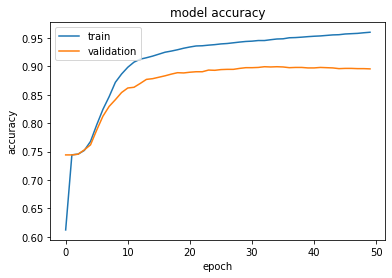

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Adding dropout layers

In [ ]:
# importing the dropout layer
from keras.layers import Dropout

In [ ]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               1772200   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 1,772,301
Trainable params: 1,772,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# training the model
model_history = model.fit(x_train, y_train, epochs=50, batch_size=128,validation_data=(x_test,y_test))

Epoch 1/50
44/44 [==============================] - 3s 20ms/step - loss: 0.5951 - accuracy: 0.7145 - val_loss: 0.5030 - val_accuracy: 0.7441
Epoch 2/50
44/44 [==============================] - 1s 15ms/step - loss: 0.5200 - accuracy: 0.7486 - val_loss: 0.4637 - val_accuracy: 0.7441
Epoch 3/50
44/44 [==============================] - 1s 15ms/step - loss: 0.4875 - accuracy: 0.7688 - val_loss: 0.4376 - val_accuracy: 0.7454
Epoch 4/50
44/44 [==============================] - 1s 15ms/step - loss: 0.4634 - accuracy: 0.7726 - val_loss: 0.4174 - val_accuracy: 0.7466
Epoch 5/50
44/44 [==============================] - 1s 15ms/step - loss: 0.4354 - accuracy: 0.7823 - val_loss: 0.3999 - val_accuracy: 0.7559
Epoch 6/50
44/44 [==============================] - 1s 15ms/step - loss: 0.4045 - accuracy: 0.8030 - val_loss: 0.3847 - val_accuracy: 0.7744
Epoch 7/50
44/44 [==============================] - 1s 14ms/step - loss: 0.3980 - accuracy: 0.8116 - val_loss: 0.3719 - val_accuracy: 0.7929
Epoch 8/50
44

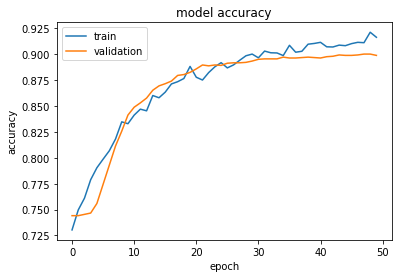

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Model Checkpointing

In [ ]:
# importing model checkpointing from keras callbacks
from keras.callbacks import ModelCheckpoint

# defining the path to store the weights
filepath="best_weights.hdf5"

# defining the model checkpointing and metric to monitor
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# defining checkpointing variable
callbacks_list = [checkpoint]

In [ ]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# training the model
model_history = model.fit(x_train, y_train, epochs=100, batch_size=256,validation_data=(x_test,y_test), callbacks=callbacks_list)

Epoch 1/150
22/22 [==============================] - 2s 52ms/step - loss: 0.7706 - accuracy: 0.4873 - val_loss: 0.5430 - val_accuracy: 0.7441

Epoch 00001: val_accuracy improved from -inf to 0.74411, saving model to best_weights.hdf5
Epoch 2/150
22/22 [==============================] - 1s 27ms/step - loss: 0.5712 - accuracy: 0.7180 - val_loss: 0.4886 - val_accuracy: 0.7441

Epoch 00002: val_accuracy did not improve from 0.74411
Epoch 3/150
22/22 [==============================] - 1s 27ms/step - loss: 0.5202 - accuracy: 0.7458 - val_loss: 0.4669 - val_accuracy: 0.7441

Epoch 00003: val_accuracy did not improve from 0.74411
Epoch 4/150
22/22 [==============================] - 1s 28ms/step - loss: 0.4919 - accuracy: 0.7629 - val_loss: 0.4490 - val_accuracy: 0.7441

Epoch 00004: val_accuracy did not improve from 0.74411
Epoch 5/150
22/22 [==============================] - 1s 28ms/step - loss: 0.4771 - accuracy: 0.7664 - val_loss: 0.4342 - val_accuracy: 0.7454

Epoch 00005: val_accuracy imp

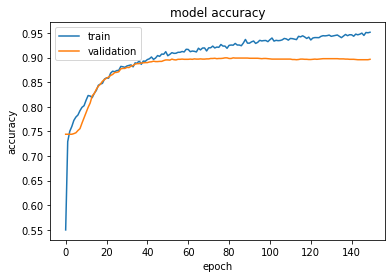

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# loading the best model
model.load_weights("best_weights.hdf5")

In [ ]:
# predictions on the train and test data
pred_train = model.predict_classes(x_train)
pred_test = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# performance on train set
f1_score(y_train, pred_train, average = 'weighted')

0.948986851577294

In [ ]:
# performance on test set
f1_score(y_test, pred_test, average = 'weighted')

0.8998612427506254

In [ ]:
# test file
test_file = pd.read_csv('test_oJQbWVk.csv')
sample_submission = pd.read_csv('sample_submission_LnhVWA4.csv')

In [ ]:
test_file.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [ ]:
test_features = count_vector.transform(test_file['tweet'])

In [ ]:
test_predictions = model.predict_classes(test_features)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
test_predictions

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
sample_submission.head()

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0


In [ ]:
sample_submission['label'] = test_predictions
sample_submission.head(10)

,id,label
0,7921,1
1,7922,0
2,7923,1
3,7924,1
4,7925,1
5,7926,0
6,7927,1
7,7928,0
8,7929,1
9,7930,0


In [ ]:
sample_submission.to_csv('submission_file.csv', index=False, header=True)